In [ ]:
#Importing Libraries
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
#Importing Dataset
Company_Data=pd.read_csv("Company_Data.csv")
Company_Data


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
Company_Data.head()
Company_Data.tail()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [40]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df=Company_Data.copy()
df['Sales_cat'] = pd.cut(x = df['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [ ]:
#Data Exploration
#Descriptive Statistics
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [ ]:
#Missing Values
df.isnull().sum()
#Duplicated Values
df.duplicated().sum()

0

In [ ]:
#columns
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_cat'],
      dtype='object')

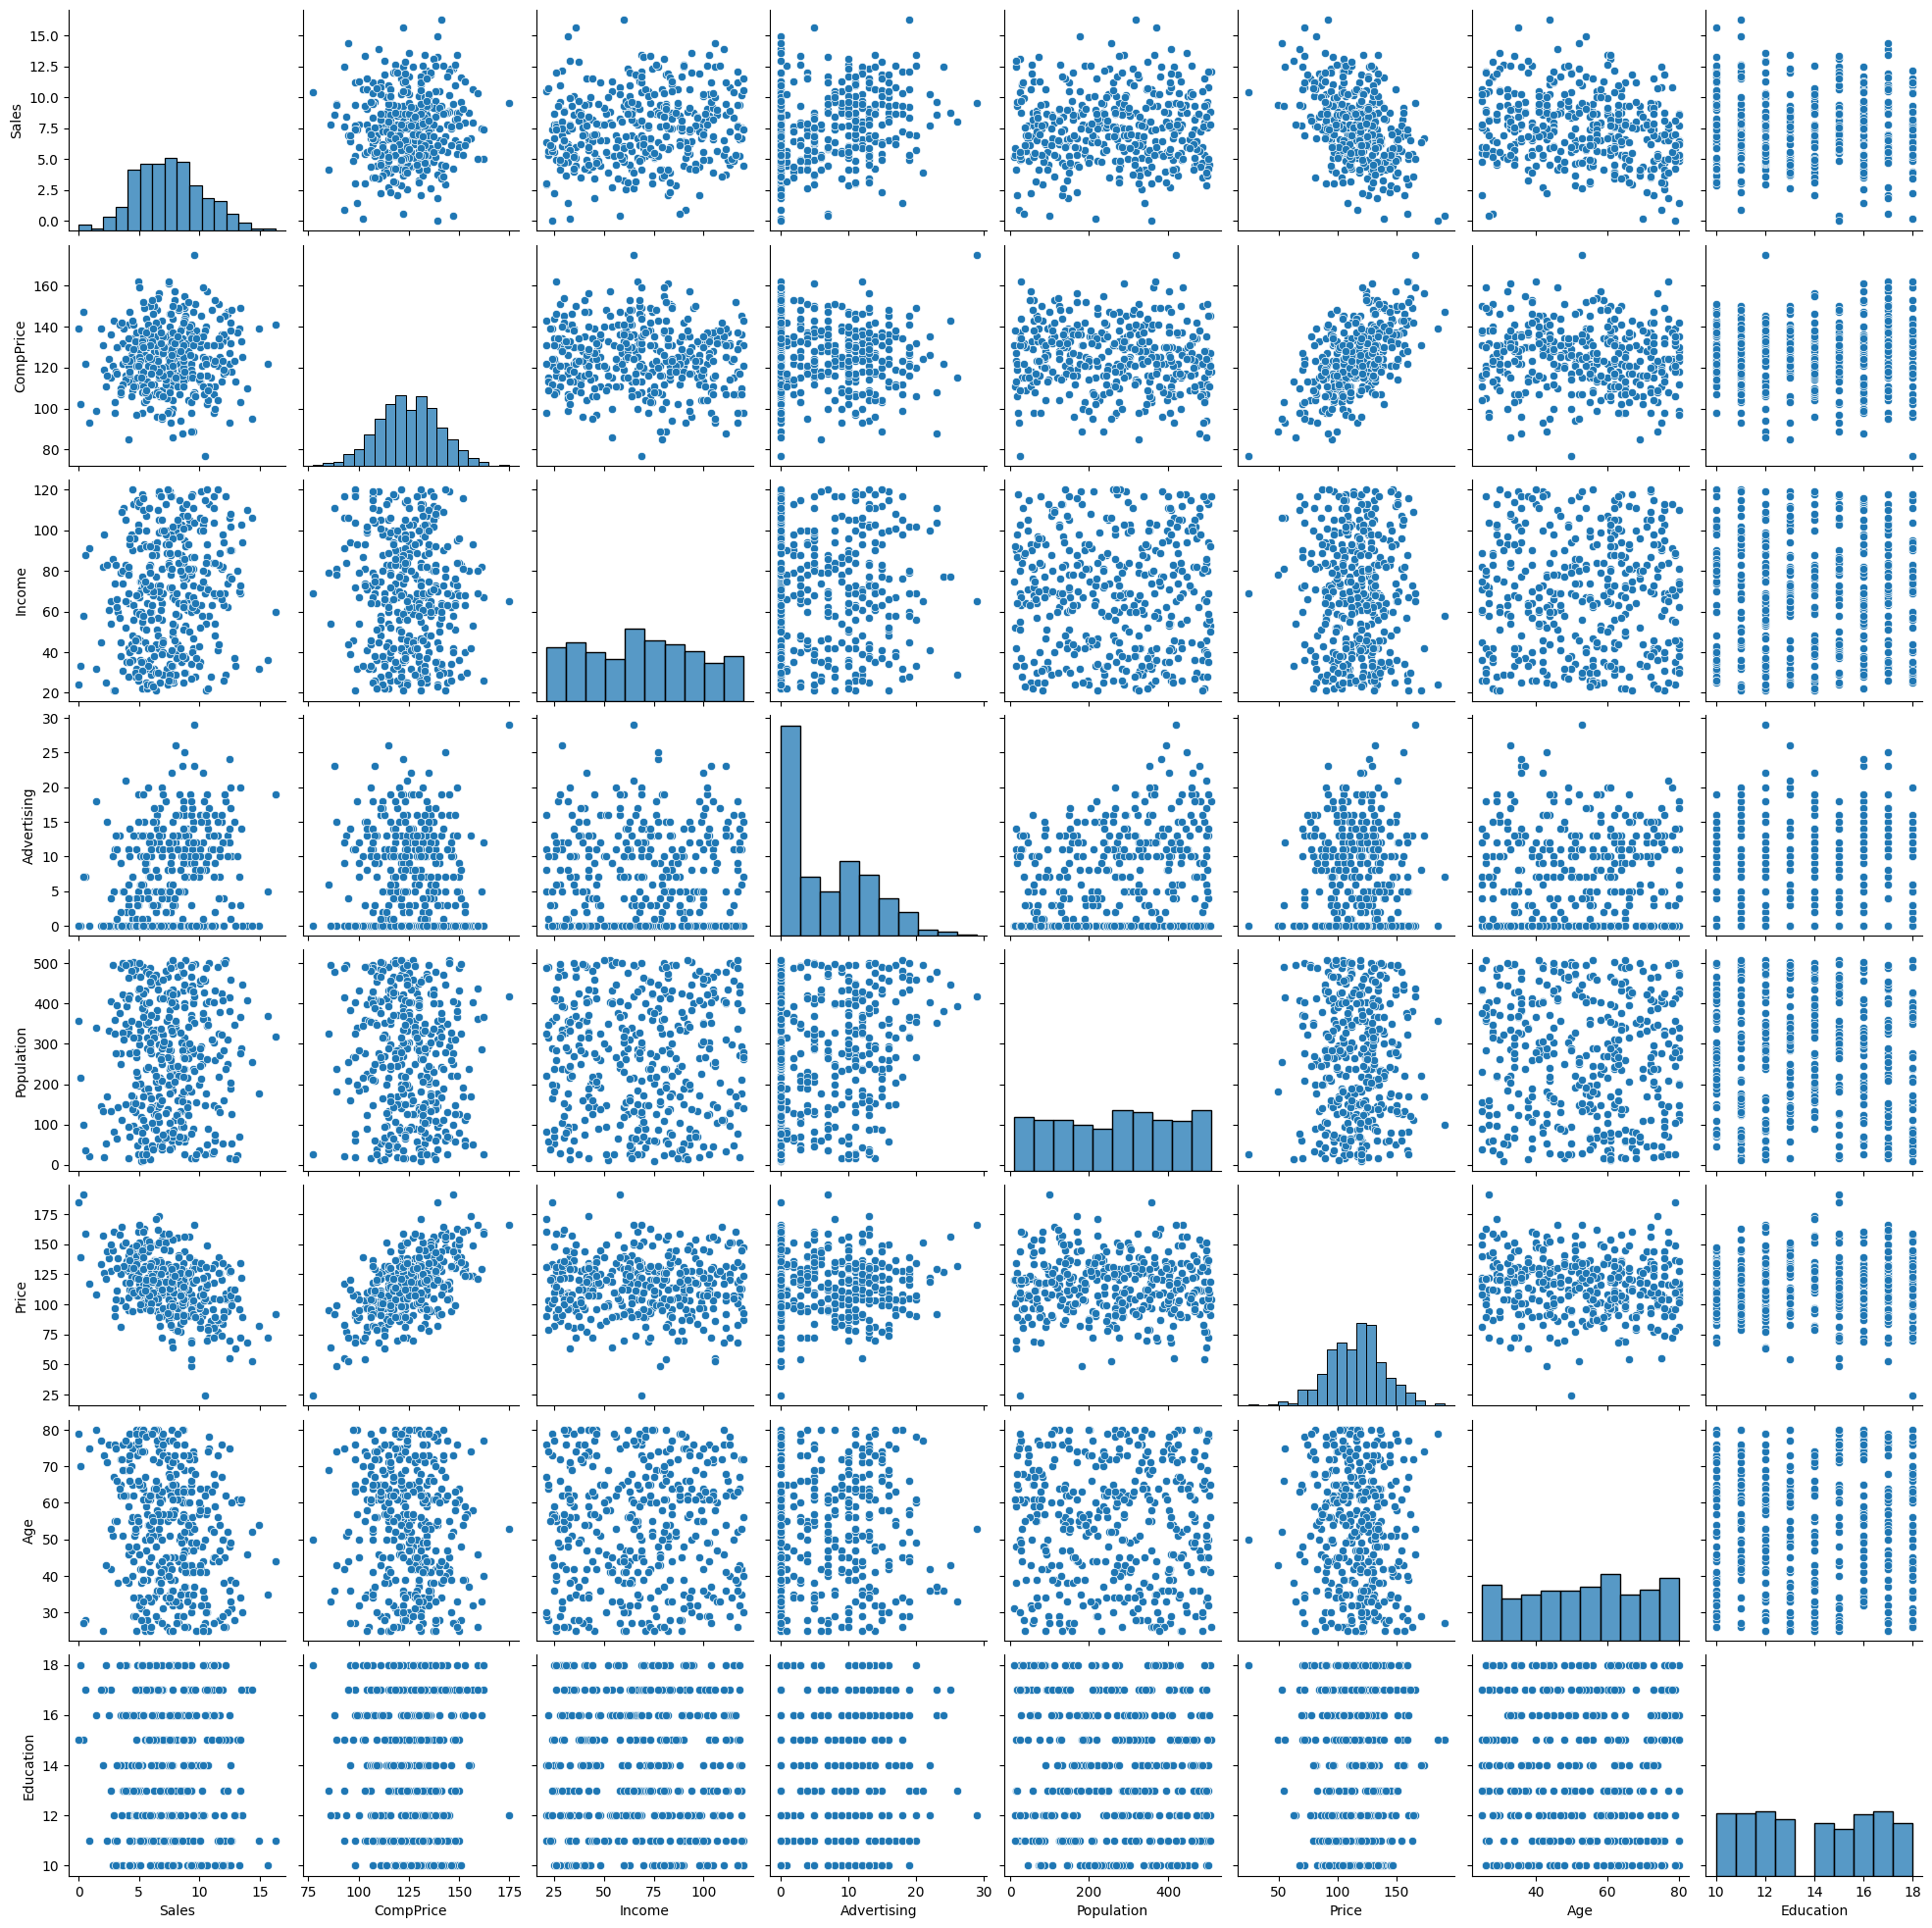

In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

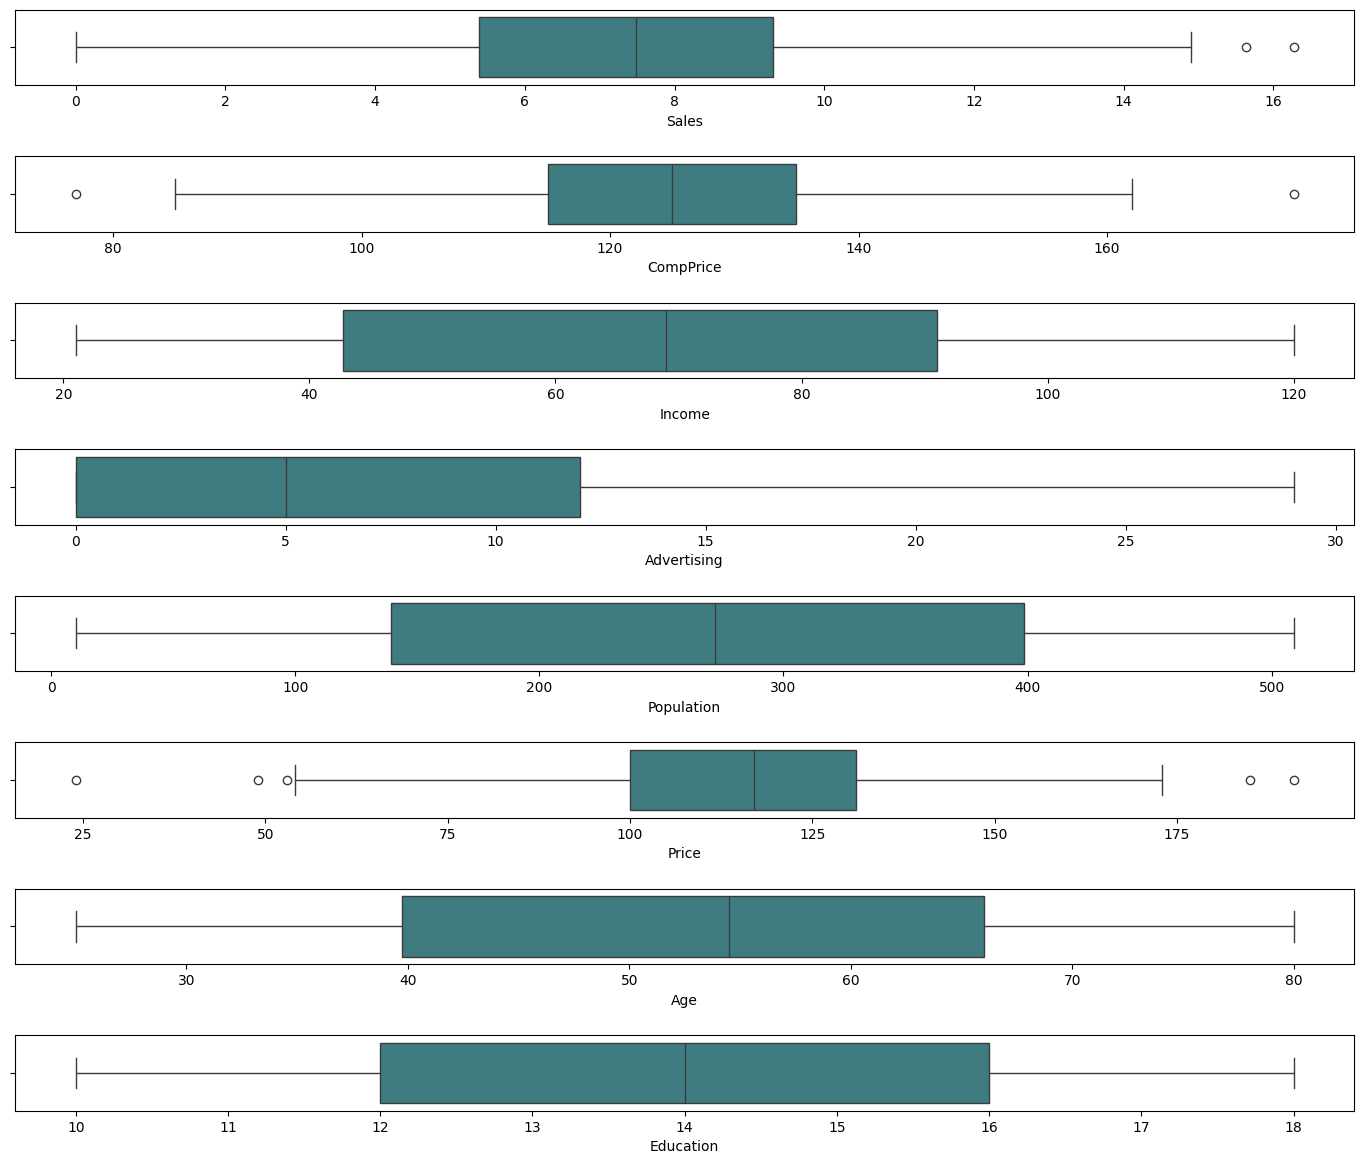

In [ ]:
#Boxplot
ot=df.copy()
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<Axes: >

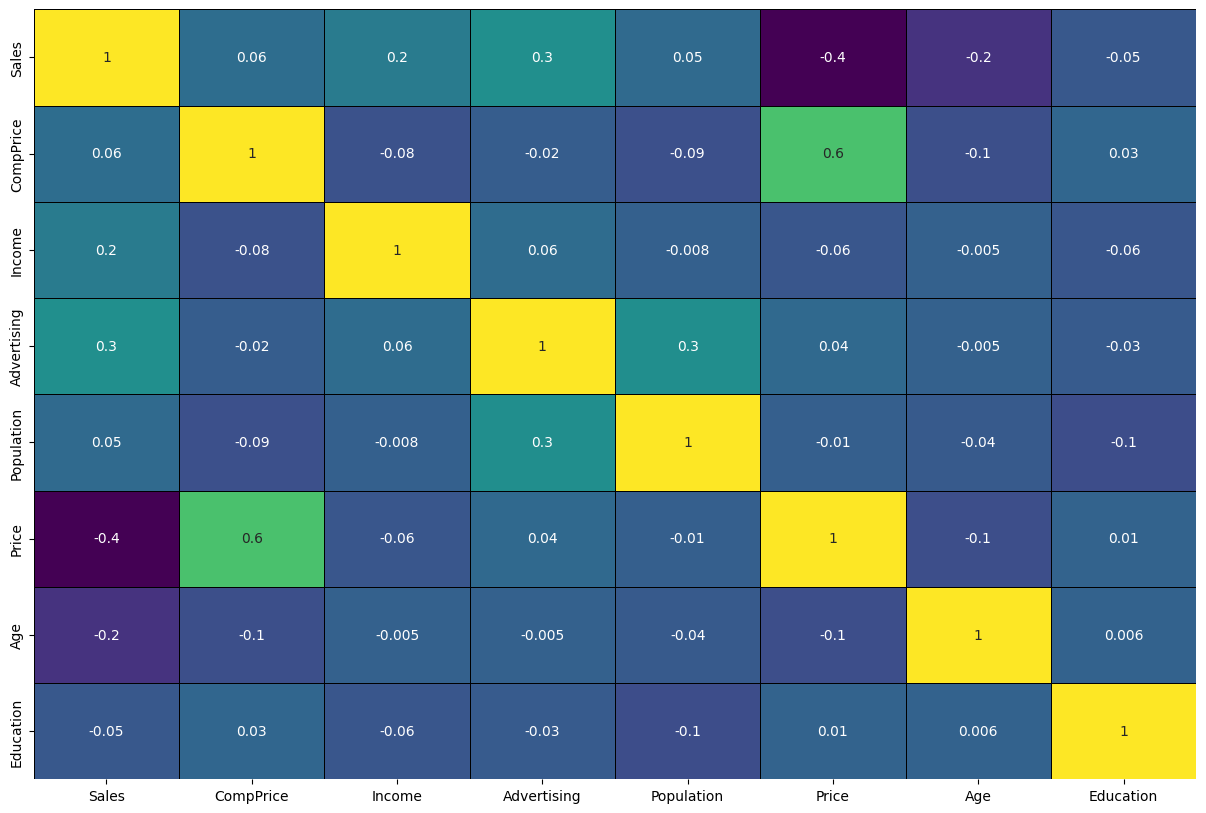

In [ ]:
# Having a look at the correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')


In [51]:
labels = df['Sales_cat'].unique

In [57]:
explode=[0.07] * len(labels)

In [64]:
sales_values = df['Sales_cat'].value_counts().values

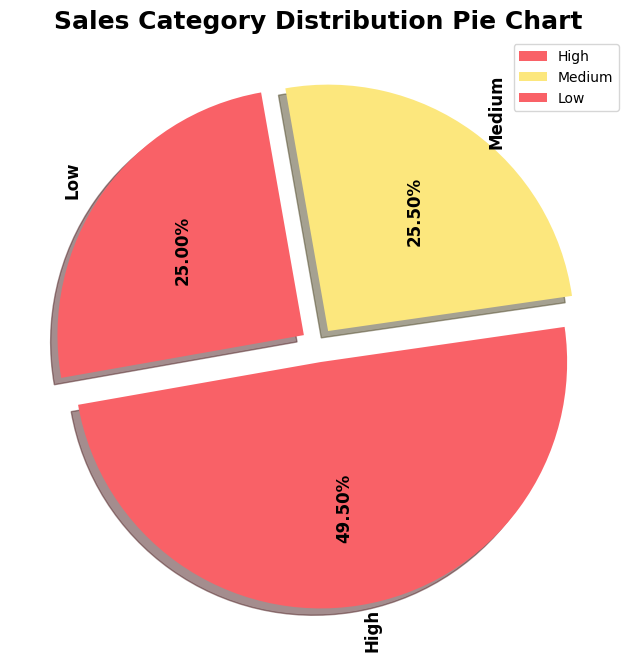

In [68]:
plt.figure(figsize=(12, 8))
plt.pie(sales_values,
        labels=labels,
        explode=explode,  # Explode each slice by 0.07
        autopct='%.2f%%',
        colors=["#F96167", "#FCE77D"],
        shadow=True,
        startangle=190,
        textprops={'size': 'large',
                   'fontweight': 'bold',
                   'rotation': 'vertical',
                   'color': 'black'})
plt.legend(loc='upper right')
plt.title("Sales Category Distribution Pie Chart", fontsize=18, fontweight='bold')
plt.show()

In [72]:
#Data Pre-Processing

data = df.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [73]:
#Creating dummy vairables of the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,11,276,120,0,42,17,1,1,0
1,11.22,111,16,260,83,1,65,10,1,1,0
2,10.06,113,10,269,80,2,59,12,1,1,0
3,7.40,117,4,466,97,2,55,14,1,1,2
4,4.15,141,3,340,128,0,38,13,1,0,1


In [77]:
#importing train and test
#spltting of x and y
x = data.drop('Sales_cat',axis=1)
y = data['Sales_cat']


In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (280, 10)
Shape of X_test:  (120, 10)
Shape of y_train:  (280,)
Shape of y_test (120,)


In [79]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [80]:
#predictions of x_train and x_tests
Y_pred_train = DT.predict(x_train)
Y_pred_test = DT.predict(x_test)

In [81]:
#Finding test and train accuracy scor
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train, Y_pred_train)
print("Training Accuracy:", (acc1).round(2))
acc2 = accuracy_score(y_test, Y_pred_test)
print("Test Accuracy:", (acc2).round(2))


Training Accuracy: 1.0
Test Accuracy: 1.0


In [82]:
#criterion='entropy'
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
#predictions of x_train and x_tests
Y_pred_train = DT.predict(x_train)
Y_pred_test = DT.predict(x_test)


In [84]:
#Finding test and train accuracy score
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train, Y_pred_train)
print("Training Accuracy:", (acc1).round(2))
acc2 = accuracy_score(y_test, Y_pred_test)
print("Test Accuracy:", (acc2).round(2))

Training Accuracy: 1.0
Test Accuracy: 1.0


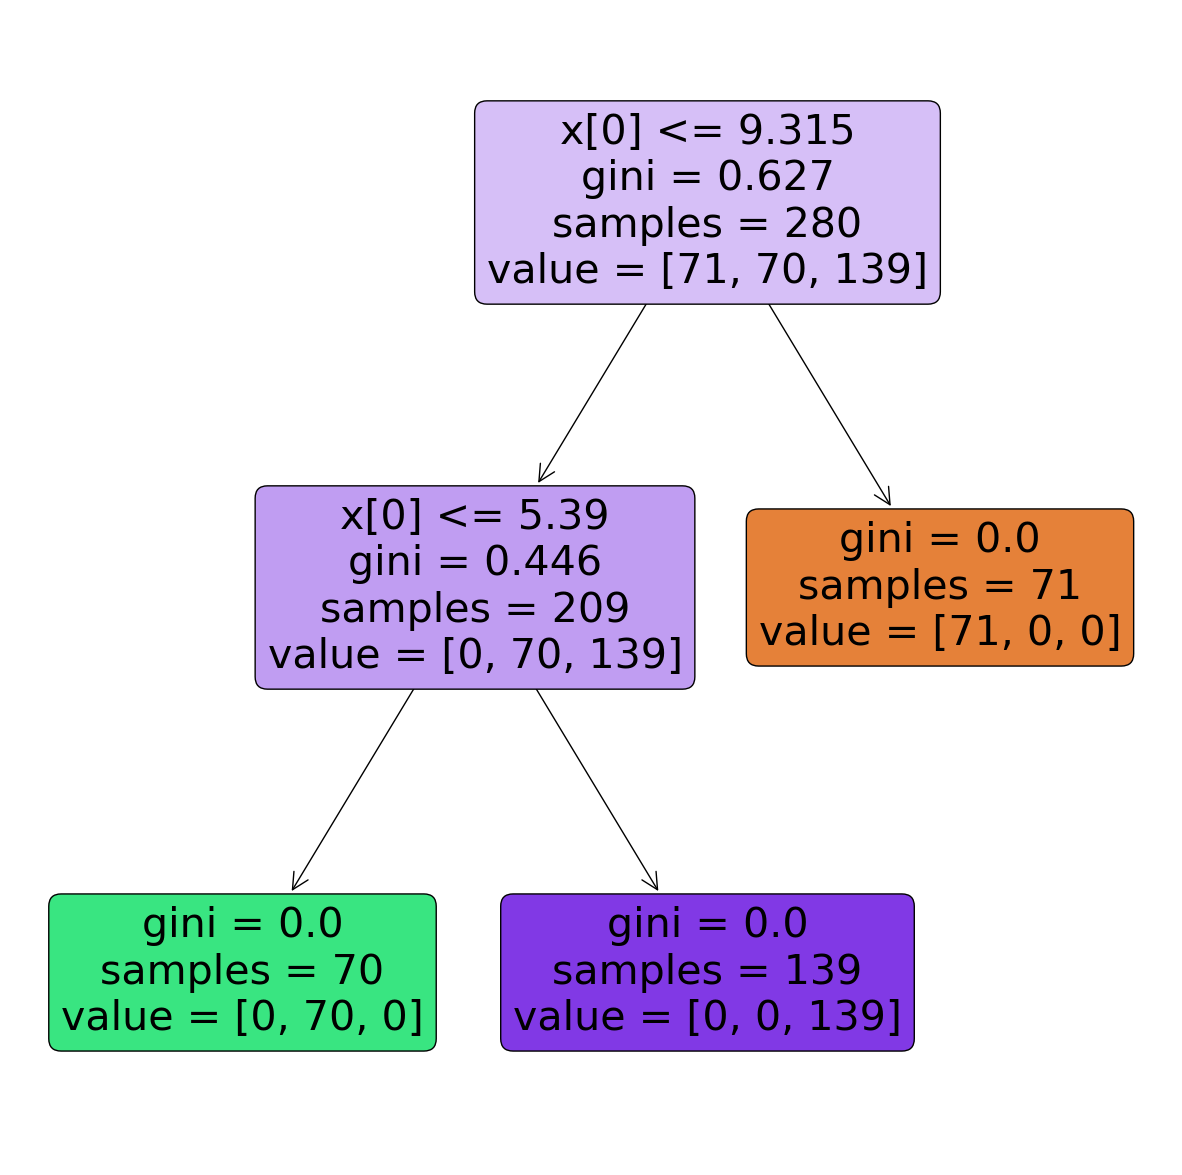

In [86]:
#Building Decision Tree Classifier
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(DT,rounded=True,filled=True)
plt.show()


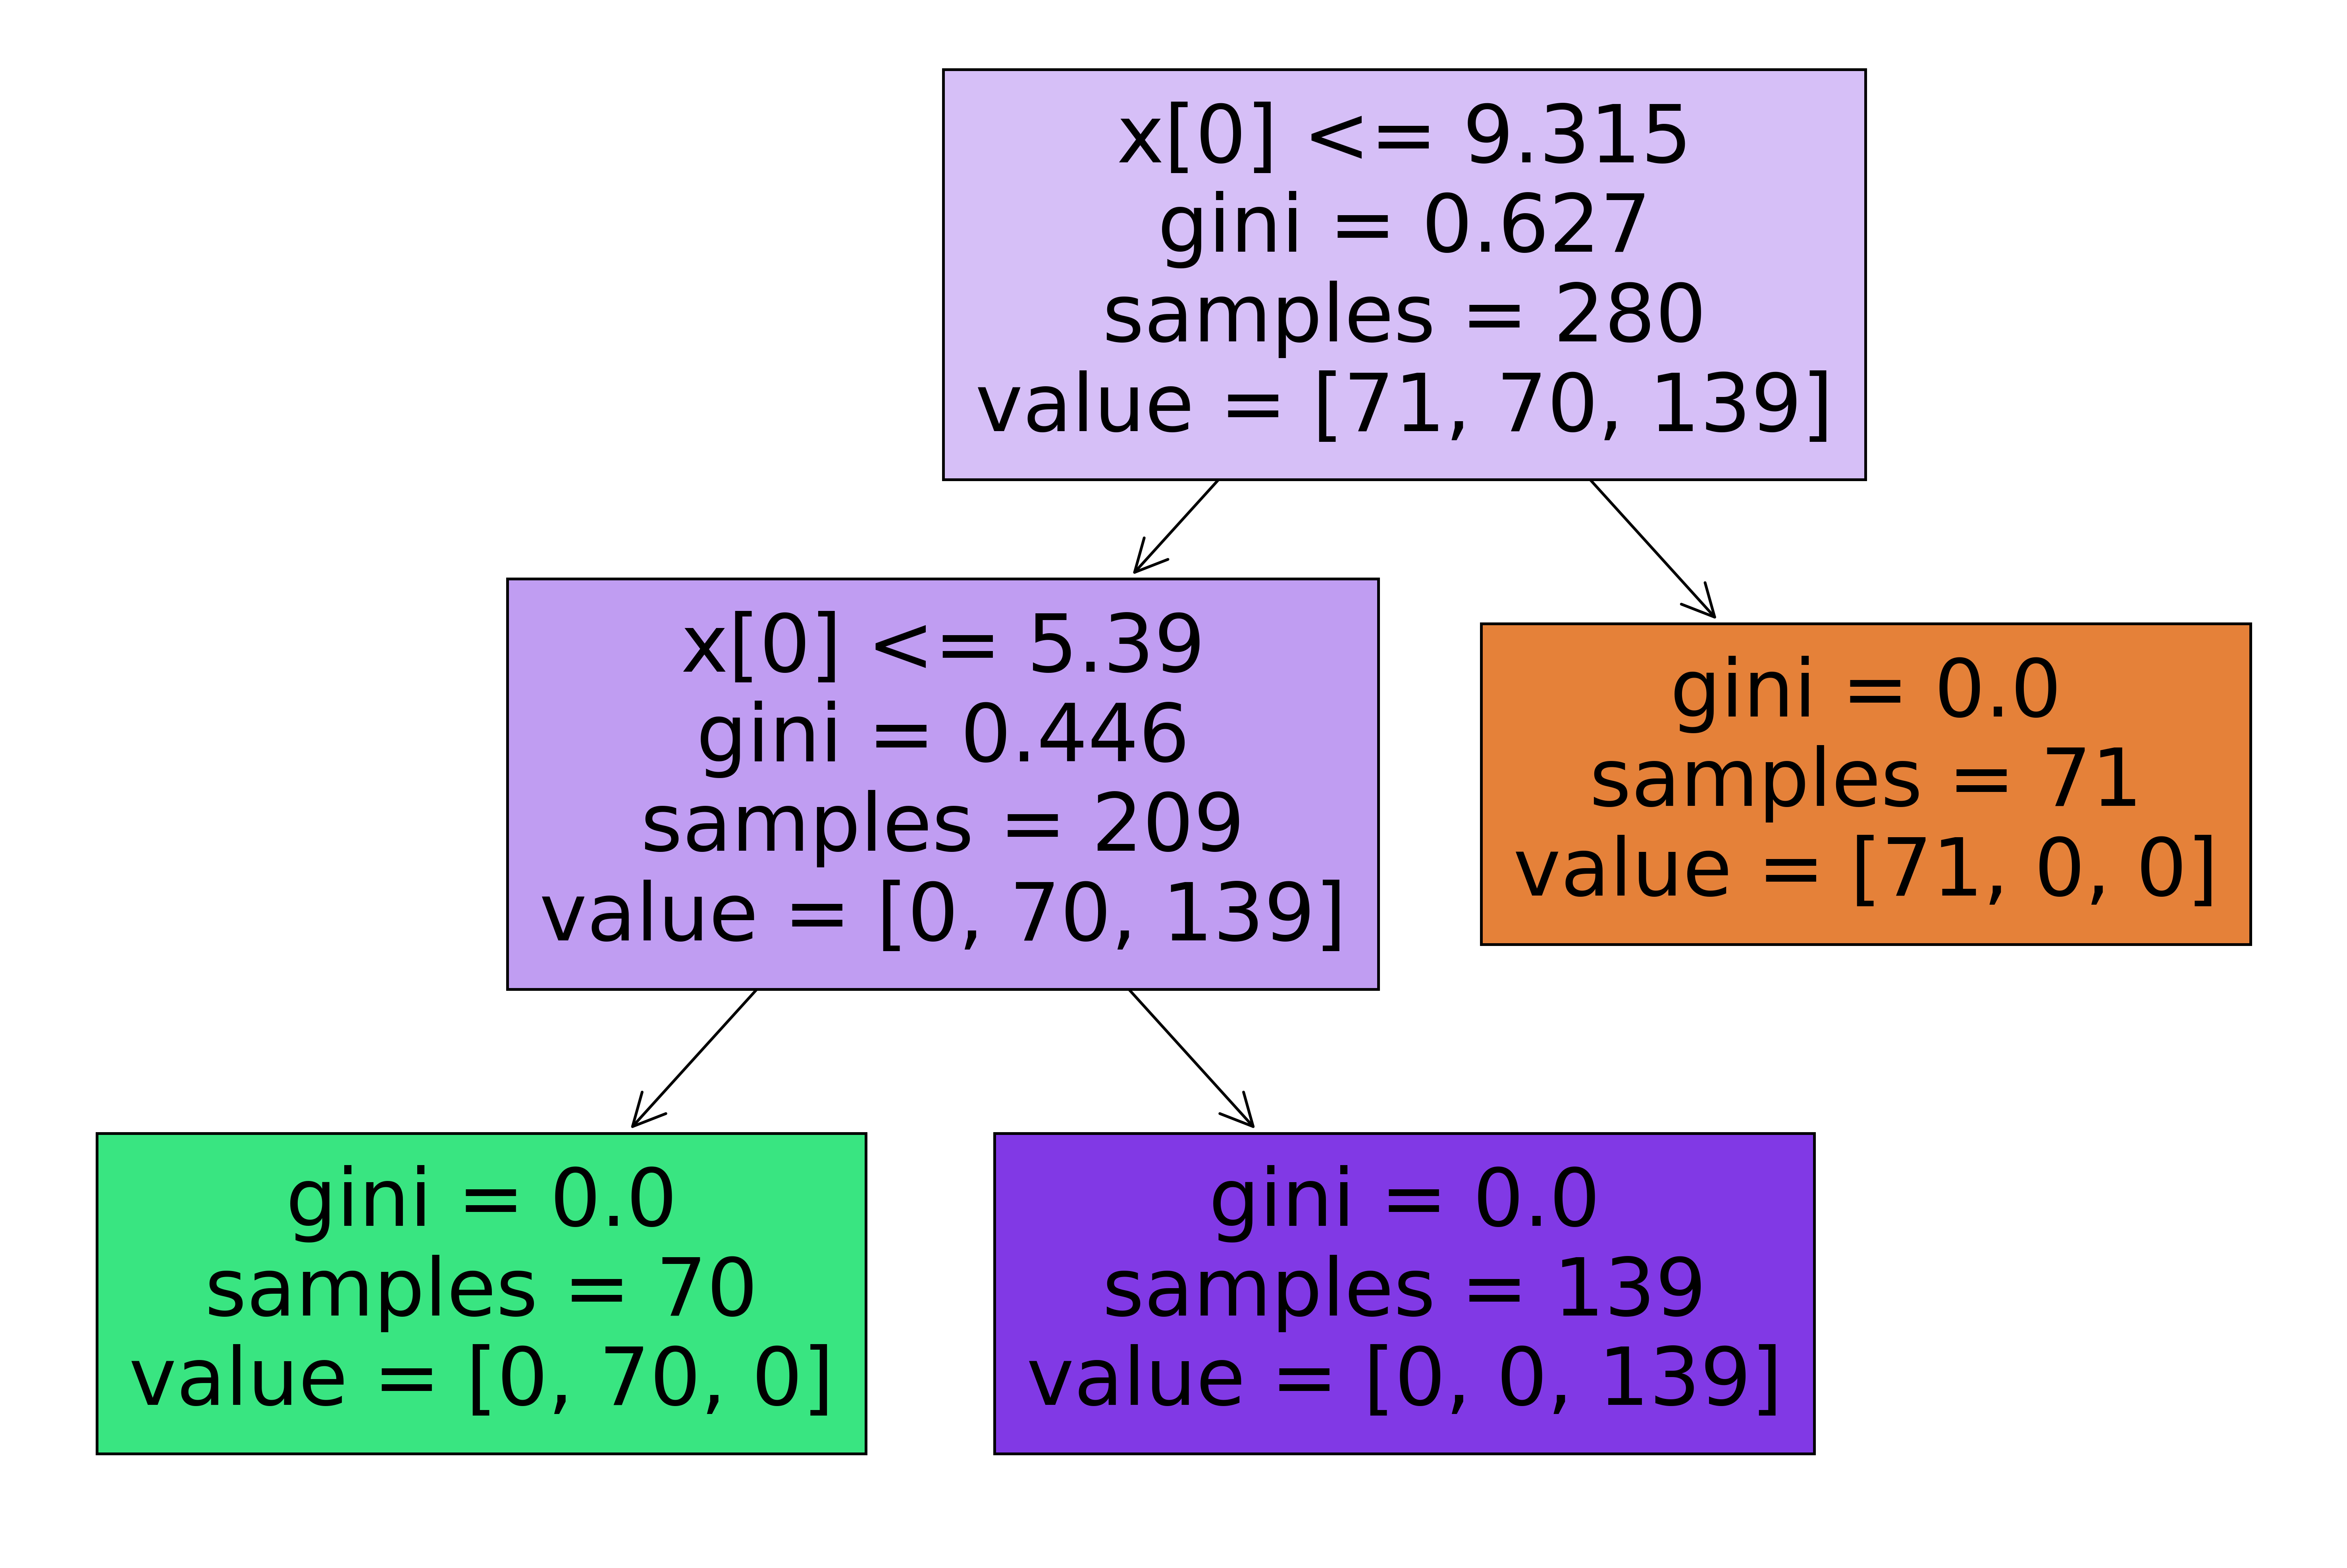

In [87]:
#Building Decision Tree Classifier using Gini Criteria
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)
DecisionTreeClassifier(random_state=0)
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()